## Star Wars Jedi
### A look at lightsabers, species, gender, rank, date of death, master, and apprentice.

In [122]:
import numpy as np
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
import re

##### First, let's grab the .csv file, which I downloaded from https://docs.google.com/spreadsheets/d/1tL__nCzQcQiNWqle-ej-we7krecKtopWDKOG0N7yMrI/edit#gid=177428702
##### Thank you to CanePlayz, who compiled this data and posted it in a discussion on https://starwars.fandom.com/f/u/27777468

In [123]:
#jedi_csv=pd.read_csv(r"C:\Users\Owner\Desktop\Data Analysis Stuff\Data Analysis Projects\Star Wars Jedi\List of All Jedi [Canon] - List of Jedi.csv")
#I changed this line because I moved computers and the file structure changed
#jedi_csv=pd.read_csv(r"C:\Users\coder\Desktop\Data Analysis Stuff\Data Analysis Projects\Star Wars Jedi\List of All Jedi [Canon] - List of Jedi.csv")

jedi_csv=pd.read_csv(r"List of All Jedi [Canon] - List of Jedi.csv")



In [124]:
#This chops the extra rows from the dataframe. From this point on, the csv file contained unverified Jedi.
jedi_csv=jedi_csv[0:170]

In [125]:
#Here is a list of the existing columns in this data set.
jedi_csv.columns

Index(['Name', 'Rank', 'Lightsaber', 'Death', 'Species and gender',
       'Leaving/getting banned from the Jedi Order', 'Jedi Master(s)',
       'Jedi Apprentice(s)', 'Wookieepedia article'],
      dtype='object')

In [126]:
#We're not going to look into whether they left or got banned from the Jedi order. We'll drop that column, as well as the link to the Wookieepedia article, 
#because we aren't using that information in this analysis.

jedi_csv=jedi_csv.drop('Leaving/getting banned from the Jedi Order',axis=1)
jedi_csv=jedi_csv.drop('Wookieepedia article',axis=1)

In [127]:
#Look at the column list again to make sure it worked correctly.
jedi_csv.columns

Index(['Name', 'Rank', 'Lightsaber', 'Death', 'Species and gender',
       'Jedi Master(s)', 'Jedi Apprentice(s)'],
      dtype='object')

In [128]:
#Break gender into its own column, separate from species
jedi_csv['Gender']=jedi_csv["Species and gender"].str.rsplit(" ").str[-1]

#print(jedi_csv.iloc["Species and gender"].str.rsplit(" ").str[-1])

In [129]:
#Make sure all entries are capitalized properly
jedi_csv['Gender']=jedi_csv['Gender'].str.capitalize()

In [130]:
#Replace NaN in the Gender column with 'Unspecified'
jedi_csv['Gender']=jedi_csv['Gender'].fillna("Unspecified")

In [131]:
#Let's take a quick look to see how our Gender column is showing up
np.unique(jedi_csv['Gender'])

array(['Female', 'Male', 'Species', "Twi'lek", 'Unspecified'],
      dtype=object)

In [132]:
#We can see we have a couple of entries there that we don't want, and it now seems 'Unknown' is better than 'Unspecified', so let's take care of all of that.
jedi_csv['Gender']=jedi_csv['Gender'].replace('Unspecified','Unknown')
jedi_csv['Gender']=jedi_csv['Gender'].replace('Species','Unknown')
jedi_csv['Gender']=jedi_csv['Gender'].replace("Twi'lek",'Unknown')

In [133]:
#Let's take another look at how our Gender column looks to make sure that worked
np.unique(jedi_csv['Gender'])

array(['Female', 'Male', 'Unknown'], dtype=object)

In [134]:
#Let's try to get rid of female and male in Species and Gender, since we put those in their own column 
jedi_csv['Species and gender']=jedi_csv['Species and gender'].str.replace("female"," ")
jedi_csv['Species and gender']=jedi_csv['Species and gender'].str.replace("Female"," ")
jedi_csv['Species and gender']=jedi_csv['Species and gender'].str.replace("male"," ")
jedi_csv['Species and gender']=jedi_csv['Species and gender'].str.replace("Male"," ")

#While we're at it, let's take care of NaN in this field and blanks and replace them with "Unknown"
jedi_csv['Species and gender']=jedi_csv['Species and gender'].replace(np.nan,"Unknown")
jedi_csv['Species and gender'] = jedi_csv['Species and gender'].replace(r'^\s*$', "Unknown", regex=True) #replace empy strings with Unknown

In [135]:
#And to verify that worked, let's look at the data again
jedi_csv.sample(10)


,Name,Rank,Lightsaber,Death,Species and gender,Jedi Master(s),Jedi Apprentice(s),Gender
36,Eno Cordova,Jedi Master,Blue,NaN,Human,NaN,Cere Junda,Male
48,Hallan Krintu,NaN,Blue,NaN,Twi'lek,NaN,NaN,Male
42,Finn Ertay,NaN,Blue,"20 BBY, killed by Darth Maul",Twi'lek,NaN,NaN,Female
135,Sora Bulq,NaN,Blue,NaN,Weequay,NaN,NaN,Male
131,Shadday Potkin,Jedi Master,NaN,NaN,Human,NaN,NaN,Female
17,Bultar Swan,Jedi Knight,Green,NaN,Human,Plo Koon,NaN,Female
127,Sean,Jedi Padawan,Blue,NaN,Human,NaN,NaN,Male
107,Phin-Law Wo,Jedi Master,NaN,NaN,Unknown,NaN,NaN,Unknown
161,Yarael Poof,Jedi Master (HCM),Blue,32 BBY - 22 BBY,Quermian,NaN,NaN,Male
134,Soara Antana,Jedi Master,NaN,NaN,Unknown,NaN,NaN,Unknown


In [136]:
#And let's rename that column, since it now only contains species
jedi_csv.rename(columns={'Species and gender':'Species'}, inplace=True)

In [137]:
#Now let's look at that Lightsaber column and see if we can clean that up. 
#Let's replace those Nan values with Unknown
jedi_csv['Lightsaber']=jedi_csv['Lightsaber'].replace(np.nan,"Unknown")

In [138]:
#Let's see what unique values we have in there now
np.unique(jedi_csv['Lightsaber'])

array(['2 (unkn. colours), later 2 red', '2 green -> 2 blue -> 2 white',
       'Black (Darksaber)', 'Blue', 'Blue and green (double)',
       'Blue and green (hybrid)', 'Blue, later green', 'Blue, later red',
       'Blue, later yellow', 'Green', 'Green, later 2 red', 'Later red',
       'Later red (IQ)', 'Lightsaber sniper rifle', 'Purple', 'Unknown',
       'Yellow (double), later red (IQ)'], dtype=object)

In [139]:
#We have a lot to fix up there, so let's get started

#Let's create a field to specify what type of saber they have. 
#We'll go with Single Blade, Double Blade, Two Single, Sniper Rifle, Hybrid Single Blade, or a mix of these separated by comma for our values

#First, let's add the new column
jedi_csv['Lightsaber Type']="Unknown" #Unknown is our default value

#Now let's take care of each of these entries
jedi_csv.loc[jedi_csv['Lightsaber']=="2 (unkn. colours), later 2 red",'Lightsaber Type']="Two Single Blades"
jedi_csv.loc[jedi_csv['Lightsaber']=='2 green -> 2 blue -> 2 white','Lightsaber Type']="Two Single Blades"
jedi_csv.loc[jedi_csv['Lightsaber']=='Black (Darksaber)','Lightsaber Type']="Single Blade"
jedi_csv.loc[jedi_csv['Lightsaber']=='Blue','Lightsaber Type']="Single Blade"
jedi_csv.loc[jedi_csv['Lightsaber']=='Blue and green (double)','Lightsaber Type']="Dual Blade"
jedi_csv.loc[jedi_csv['Lightsaber']=='Blue and green (hybrid)','Lightsaber Type']="Hybrid Single Blade"
jedi_csv.loc[jedi_csv['Lightsaber']=='Blue, later green','Lightsaber Type']="Single Blade"
jedi_csv.loc[jedi_csv['Lightsaber']=='Blue, later red','Lightsaber Type']="Single Blade"
jedi_csv.loc[jedi_csv['Lightsaber']=='Blue, later yellow','Lightsaber Type']="Single Blade"
jedi_csv.loc[jedi_csv['Lightsaber']=='Green','Lightsaber Type']="Single Blade"
jedi_csv.loc[jedi_csv['Lightsaber']=='Green, later 2 red','Lightsaber Type']="Single Blade, Two Single Blades"
jedi_csv.loc[jedi_csv['Lightsaber']=='Later red','Lightsaber Type']="Single Blade"
jedi_csv.loc[jedi_csv['Lightsaber']=='Later red (IQ)','Lightsaber Type']="Single Blade"
jedi_csv.loc[jedi_csv['Lightsaber']=='Lightsaber sniper rifle','Lightsaber Type']="Sniper Rifle"
jedi_csv.loc[jedi_csv['Lightsaber']=='Purple','Lightsaber Type']="Single Blade"
jedi_csv.loc[jedi_csv['Lightsaber']=='Yellow (double), later red (IQ)','Lightsaber Type']="Dual Blade"

In [140]:
np.unique(jedi_csv['Lightsaber Type'])

array(['Dual Blade', 'Hybrid Single Blade', 'Single Blade',
       'Single Blade, Two Single Blades', 'Sniper Rifle',
       'Two Single Blades', 'Unknown'], dtype=object)

In [141]:
#Now let's see what we can do with those colors. Maybe a new field, 'Lightsaber Color'"List of All Jedi [Canon] - List of Jedi.csv"
jedi_csv['Lightsaber Color']="Unknown" #Unknown is our default value

#Our values are going to be Blue, Red, Green, White, Yellow, Purple, Dark Saber, and Multiple

jedi_csv.loc[jedi_csv['Lightsaber']=='2 green -> 2 blue -> 2 white','Lightsaber Color']="Multiple"
jedi_csv.loc[jedi_csv['Lightsaber']=='Black (Darksaber)','Lightsaber Color']="Dark Saber"
jedi_csv.loc[jedi_csv['Lightsaber']=='Blue','Lightsaber Color']="Blue"
jedi_csv.loc[jedi_csv['Lightsaber']=='Blue and green (double)','Lightsaber Color']="Multiple"
jedi_csv.loc[jedi_csv['Lightsaber']=='Blue and green (hybrid)','Lightsaber Color']="Multiple"
jedi_csv.loc[jedi_csv['Lightsaber']=='Blue, later green','Lightsaber Color']="Multiple"
jedi_csv.loc[jedi_csv['Lightsaber']=='Blue, later red','Lightsaber Color']="Multiple"
jedi_csv.loc[jedi_csv['Lightsaber']=='Blue, later yellow','Lightsaber Color']="Multiple"
jedi_csv.loc[jedi_csv['Lightsaber']=='Green','Lightsaber Color']="Green"
jedi_csv.loc[jedi_csv['Lightsaber']=='Green, later 2 red','Lightsaber Color']="Multiple"
jedi_csv.loc[jedi_csv['Lightsaber']=='Later red','Lightsaber Color']="Red"
jedi_csv.loc[jedi_csv['Lightsaber']=='Later red (IQ)','Lightsaber Color']="Red"
jedi_csv.loc[jedi_csv['Lightsaber']=='Purple','Lightsaber Color']="Purple"
jedi_csv.loc[jedi_csv['Lightsaber']=='Yellow (double), later red (IQ)','Lightsaber Color']="Multiple" 

In [142]:
np.unique(jedi_csv['Lightsaber Color'])

array(['Blue', 'Dark Saber', 'Green', 'Multiple', 'Purple', 'Red',
       'Unknown'], dtype=object)

In [143]:
#So now let's take a look at that Death column.
#We should split that into Date of Death and Cause of Death

jedi_csv['Date of Death']="Unknown" #Unknown is our default value
jedi_csv['Cause of Death']="Unknown" #Unknown is our default value

#I'm going to capitalize all of the Death column as a title so I won't need to do it later, and it will save problems later on when I split.
jedi_csv['Death']=jedi_csv['Death'].str.title()

#Also need to go ahead and cap ABY and BBY now, before we split the columns
jedi_csv['Death']=jedi_csv['Death'].str.replace("Bby","BBY") 
jedi_csv['Death']=jedi_csv['Death'].str.replace("Aby","ABY") 

#Let's get that Cause of death
jedi_csv['Cause of Death']=jedi_csv["Death"].str.rsplit(",").str[-1] #used to be rsplit(",",1), but that no longer works?
jedi_csv['Date of Death']=jedi_csv["Death"].str.rsplit(",").str[0]

#Replace NaN with unknown
jedi_csv['Cause of Death']=jedi_csv['Cause of Death'].replace(np.nan,"Unknown")
jedi_csv['Date of Death']=jedi_csv['Date of Death'].replace(np.nan,"Unknown")

#And let's remove the extra space that may be at the end of those.
jedi_csv['Cause of Death']=jedi_csv['Cause of Death'].str.strip()
jedi_csv['Date of Death']=jedi_csv['Date of Death'].str.strip()

#No longer need to do this because I used the title thing on the Death column above. I'd have been better off using title case here, anyway.
#jedi_csv['Cause of Death']=jedi_csv['Cause of Death'].str.capitalize()
#jedi_csv['Date of Death']=jedi_csv['Date of Death'].str.capitalize()


In [144]:
#Let's see how we stand now
jedi_csv.sample(20)

,Name,Rank,Lightsaber,Death,Species,Jedi Master(s),Jedi Apprentice(s),Gender,Lightsaber Type,Lightsaber Color,Date of Death,Cause of Death
167,Zatt,Jedi youngling,Green,NaN,Nautolan,NaN,NaN,Male,Single Blade,Green,Unknown,Unknown
4,Akar-Deshu,Jedi Knight,Blue,"19 BBY, Killed By Quinlas Vos Aboard The Vigil...",Mahran,NaN,NaN,Male,Single Blade,Blue,19 BBY,Killed By Quinlas Vos Aboard The Vigilance
143,Tera Sinube,Jedi Master,Blue,By 9 BBY,Cosian,NaN,NaN,Male,Single Blade,Blue,By 9 BBY,By 9 BBY
166,Zang Arraira,Jedi Padawan,Unknown,NaN,Unknown,NaN,NaN,Female,Unknown,Unknown,Unknown,Unknown
93,Niobaya,Jedi Master,Unknown,NaN,Unknown,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
107,Phin-Law Wo,Jedi Master,Unknown,NaN,Unknown,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
114,Que-Mars Redath-Gom,Jedi Knight,Green,NaN,Weequay,NaN,NaN,Male,Single Blade,Green,Unknown,Unknown
14,Bene,Jedi Padawan,Blue,"19 BBY, Killed By Darth Vader On Coruscant",Human,NaN,NaN,Female,Single Blade,Blue,19 BBY,Killed By Darth Vader On Coruscant
141,Taron Malicos,Jedi Master,"2 (unkn. colours), later 2 red","14 BBY, Killed By Cal Kestis And Merrin On Dat...",Human,NaN,NaN,Male,Two Single Blades,Unknown,14 BBY,Killed By Cal Kestis And Merrin On Dathomir
28,Crucitorn,Jedi Master,Unknown,NaN,Unknown,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown


In [145]:
#Let's take a closer look at that Date of Death column
np.unique(jedi_csv['Date of Death'])

array(['0 BBY', '14 BBY', '18 BBY', '19 BBY', '20 BBY', '21 BBY',
       '22 BBY', '3 BBY', '32 BBY', '32 BBY - 22 BBY', '34 ABY', '35 ABY',
       '4 ABY', '4 ABY On Dagobah', '4 BBY', 'Around 30 ABY',
       'Around 32 BBY', 'Around 48 BBY', 'Between 18 BBY And 14 BBY',
       'Between 19 BBY And 18 BBY', 'Between 22 BBY And 20 BBY',
       'By 9 BBY', 'Prior To 22 BBY',
       'Prior To The Establishment Of The Galactic Republic',
       'Sometime Prior To 0 BBY', 'Sometime Prior To 19 BBY',
       'Sometime Prior To 22 BBY', 'Unknown',
       'Within A Decade Of The Corsair Wars'], dtype=object)

In [146]:
#There's a lot of data we need to break apart there if we're going to be able to graph it and make any sense of it, so let's get started.

#First, let's replace all the "between x bby and y bby" with x-y bby
jedi_csv['Date of Death']=jedi_csv['Date of Death'].str.replace(" Bby and ","-")

#Get rid of "Between"
jedi_csv['Date of Death']=jedi_csv['Date of Death'].str.replace("Between ","")

#There are still some " bby - " entries to take care of
jedi_csv['Date of Death']=jedi_csv['Date of Death'].str.replace(" Bby - ","-")

#Let's get rid of "Around","Prior to", "By", and "Sometime"
jedi_csv['Date of Death']=jedi_csv['Date of Death'].str.replace("Around","") #Don't need "around" because we are close enough for our uses by just using year
jedi_csv['Date of Death']=jedi_csv['Date of Death'].str.replace("Sometime","") #Sometime is just a waste of space for us here
jedi_csv['Date of Death']=jedi_csv['Date of Death'].str.replace("Prior To","Before") #Before covers this more succinctly
#jedi_csv['Date of Death']=jedi_csv['Date of Death'].str.replace("prior To","Before") #Before covers this more succinctly
jedi_csv['Date of Death']=jedi_csv['Date of Death'].str.replace("By","") #See Around above

#Now let's clean up that reference to the Corsair wars, 'Before the establishment of the galactic republic', and " on dagobah"
jedi_csv['Date of Death']=jedi_csv['Date of Death'].str.replace('Within A Decade Of The Corsair Wars',"By 19 BBY") #Corsair Wars were prior to 19 BBY per Starwars.fandom.com
jedi_csv['Date of Death']=jedi_csv['Date of Death'].str.replace('Before The Establishment Of The Galactic Republic',"By 25,000 BBY") #Per Starwars.fandom.com
jedi_csv['Date of Death']=jedi_csv['Date of Death'].str.replace(" On Dagobah","")

In [147]:
#Let's see where we're at now
np.unique(jedi_csv['Date of Death'])

array([' 30 ABY', ' 32 BBY', ' 48 BBY', ' 9 BBY', ' Before 0 BBY',
       ' Before 19 BBY', ' Before 22 BBY', '0 BBY', '14 BBY', '18 BBY',
       '18 BBY And 14 BBY', '19 BBY', '19 BBY And 18 BBY', '20 BBY',
       '21 BBY', '22 BBY', '22 BBY And 20 BBY', '3 BBY', '32 BBY',
       '32 BBY - 22 BBY', '34 ABY', '35 ABY', '4 ABY', '4 BBY',
       'Before 22 BBY', 'By 19 BBY', 'By 25,000 BBY', 'Unknown'],
      dtype=object)

In [148]:
#You can see we still have a litte work to do. We have lower case bby and aby, spaces to start some values, and that pesky one that talks about darth sidious

#Let's upper case all those bby and aby first
#No longer need to do this here, since I did it for the Death column before splitting these out.
#jedi_csv['Date of Death']=jedi_csv['Date of Death'].str.replace("Bby","BBY") 
#jedi_csv['Date of Death']=jedi_csv['Date of Death'].str.replace("Aby","ABY") 

#Now let's strip away that extra space
jedi_csv['Date of Death']=jedi_csv['Date of Death'].str.strip()

In [149]:
#But we still have the killed by darth sidious entry that can be problematic. Before we just strip that part off, let's check to make sure that part was entered into the
#Cause of Death column properly
jedi_csv[jedi_csv['Date of Death']=='35 ABY, Killed By Darth Sidious On Exegol']

,Name,Rank,Lightsaber,Death,Species,Jedi Master(s),Jedi Apprentice(s),Gender,Lightsaber Type,Lightsaber Color,Date of Death,Cause of Death


In [150]:
#We can see that the cause of death didn't get that, so let's set that real quick. It's only one row, so we'll dot it the quick way.
jedi_csv['Cause of Death']=jedi_csv['Cause of Death'].str.replace("Later Resuscitated","Killed By Darth Sidious On Exegol. Later Resuscitated.") 

In [151]:
jedi_csv[jedi_csv['Date of Death']=='35 ABY, Killed By Darth Sidious On Exegol']

,Name,Rank,Lightsaber,Death,Species,Jedi Master(s),Jedi Apprentice(s),Gender,Lightsaber Type,Lightsaber Color,Date of Death,Cause of Death


In [152]:
#And now we can clean up the Date of Death field with sidious in it
jedi_csv['Date of Death']=jedi_csv['Date of Death'].str.replace('35 ABY, Killed By Darth Sidious On Exegol',"35 BBY") 

In [153]:
#Let's see where we're at with that Date of Death now
np.unique(jedi_csv['Date of Death'])

array(['0 BBY', '14 BBY', '18 BBY', '18 BBY And 14 BBY', '19 BBY',
       '19 BBY And 18 BBY', '20 BBY', '21 BBY', '22 BBY',
       '22 BBY And 20 BBY', '3 BBY', '30 ABY', '32 BBY',
       '32 BBY - 22 BBY', '34 ABY', '35 ABY', '4 ABY', '4 BBY', '48 BBY',
       '9 BBY', 'Before 0 BBY', 'Before 19 BBY', 'Before 22 BBY',
       'By 19 BBY', 'By 25,000 BBY', 'Unknown'], dtype=object)

In [154]:
#That looks pretty clean, so let's now take a look at the Cause of Death field
np.unique(jedi_csv['Cause of Death'])

array(['21 BBY', '32 BBY - 22 BBY', '4 ABY On Dagobah', 'By 9 BBY',
       'Defeated By Kanan Jarrus Aboard The Sovereign',
       'Died On Ahch-To After Projecting Himself To Crait',
       'Died On Ajan Kloss After Reaching Out To Ben Solo On Kef Bir',
       "Died On Pam'Ba", 'Killed By Ahsoka Tano On Raada',
       'Killed By An Anooba On Lola Sayu',
       'Killed By Anakin Skywalker Aboard The Invisible Hand',
       'Killed By Asajj Ventress',
       'Killed By Cad Bane In The Devaron System',
       'Killed By Cal Kestis And Merrin On Dathomir',
       'Killed By Clone Troopers During Order 66 In The Bracca System',
       'Killed By Clone Troopers During Order 66 On Coruscant',
       'Killed By Clone Troopers During Order 66 On Felucia',
       'Killed By Clone Troopers During Order 66 On His Way To Rodia',
       'Killed By Clone Troopers During Order 66 On Kaller',
       'Killed By Clone Troopers During Order 66 On Mygeeto',
       'Killed By Clone Troopers During Order 66

In [155]:
#We're more interested in way they died, not where, so let's get rid of all of those "on ..."
jedi_csv['Cause of Death']=jedi_csv["Cause of Death"].str.rsplit(" o\On").str[0]

#We also have a lot of "in the ... system", so let's get rid of that
jedi_csv['Cause of Death']=jedi_csv["Cause of Death"].str.rsplit(" In The").str[0]

#We also have a lot of "over ... system", so let's get rid of that
jedi_csv['Cause of Death']=jedi_csv["Cause of Death"].str.rsplit(" Over ").str[0]


In [156]:
np.unique(jedi_csv['Cause of Death'])

array(['21 BBY', '32 BBY - 22 BBY', '4 ABY On Dagobah', 'By 9 BBY',
       'Defeated By Kanan Jarrus Aboard The Sovereign',
       'Died On Ahch-To After Projecting Himself To Crait',
       'Died On Ajan Kloss After Reaching Out To Ben Solo On Kef Bir',
       "Died On Pam'Ba", 'Killed By Ahsoka Tano On Raada',
       'Killed By An Anooba On Lola Sayu',
       'Killed By Anakin Skywalker Aboard The Invisible Hand',
       'Killed By Asajj Ventress', 'Killed By Cad Bane',
       'Killed By Cal Kestis And Merrin On Dathomir',
       'Killed By Clone Troopers During Order 66',
       'Killed By Clone Troopers During Order 66 On Coruscant',
       'Killed By Clone Troopers During Order 66 On Felucia',
       'Killed By Clone Troopers During Order 66 On His Way To Rodia',
       'Killed By Clone Troopers During Order 66 On Kaller',
       'Killed By Clone Troopers During Order 66 On Mygeeto',
       'Killed By Clone Troopers During Order 66 On Saleucami',
       'Killed By Clone Troopers D

In [157]:
#That looks somewhat better, so now let's look at the rows of some of those and make sure some of that data, like years, appeared in the right rows like they should
print(jedi_csv[jedi_csv['Cause of Death'].isin( ['21 BBY','32 BBY - 22 BBY','4 ABY', 'By 9 BBY','Sometime Pior To 0 BBY'])])

             Name               Rank Lightsaber            Death      Species   
101  Ord Enisence        Jedi Knight    Unknown           21 BBY  Skrilling    \
143   Tera Sinube        Jedi Master       Blue         By 9 BBY     Cosian     
161   Yarael Poof  Jedi Master (HCM)       Blue  32 BBY - 22 BBY   Quermian     

    Jedi Master(s) Jedi Apprentice(s) Gender Lightsaber Type Lightsaber Color   
101            NaN                NaN   Male         Unknown          Unknown  \
143            NaN                NaN   Male    Single Blade             Blue   
161            NaN                NaN   Male    Single Blade             Blue   

       Date of Death   Cause of Death  
101           21 BBY           21 BBY  
143            9 BBY         By 9 BBY  
161  32 BBY - 22 BBY  32 BBY - 22 BBY  


In [158]:
#We can just set all of those to Unknown, since the values showed up correctly in the Date of Death field
#jedi_csv[jedi_csv['Cause of Death'].isin( ['21 bby','32 bby - 22 bby','4 aby', 'By 9 bby','Sometime prior to 0 bby'])]

jedi_csv['Cause of Death']=np.where(jedi_csv['Cause of Death'].isin(['21 BBY','32 BBY - 22 BBY','4 ABY', 'By 9 BBY','Sometime Prior To 0 BBY']),"Unknown",jedi_csv['Cause of Death'])

In [159]:
#Let's see how we stand now
np.unique(jedi_csv['Cause of Death'])

array(['4 ABY On Dagobah',
       'Defeated By Kanan Jarrus Aboard The Sovereign',
       'Died On Ahch-To After Projecting Himself To Crait',
       'Died On Ajan Kloss After Reaching Out To Ben Solo On Kef Bir',
       "Died On Pam'Ba", 'Killed By Ahsoka Tano On Raada',
       'Killed By An Anooba On Lola Sayu',
       'Killed By Anakin Skywalker Aboard The Invisible Hand',
       'Killed By Asajj Ventress', 'Killed By Cad Bane',
       'Killed By Cal Kestis And Merrin On Dathomir',
       'Killed By Clone Troopers During Order 66',
       'Killed By Clone Troopers During Order 66 On Coruscant',
       'Killed By Clone Troopers During Order 66 On Felucia',
       'Killed By Clone Troopers During Order 66 On His Way To Rodia',
       'Killed By Clone Troopers During Order 66 On Kaller',
       'Killed By Clone Troopers During Order 66 On Mygeeto',
       'Killed By Clone Troopers During Order 66 On Saleucami',
       'Killed By Clone Troopers During Order 66 On Zeffo',
       'Killed 

In [160]:
#Let's take a look at the remaining problematic entries

#Prior to the establishment of the galactic republic
jedi_csv['Cause of Death']=jedi_csv["Cause of Death"].str.replace('Prior To The Establishment Of The Galactic Republic',"Unknown")

jedi_csv['Cause of Death']=jedi_csv["Cause of Death"].str.replace('Utupau',"Unknown")

In [161]:
#Let's see how we stand now
np.unique(jedi_csv['Cause of Death'])

array(['4 ABY On Dagobah',
       'Defeated By Kanan Jarrus Aboard The Sovereign',
       'Died On Ahch-To After Projecting Himself To Crait',
       'Died On Ajan Kloss After Reaching Out To Ben Solo On Kef Bir',
       "Died On Pam'Ba", 'Killed By Ahsoka Tano On Raada',
       'Killed By An Anooba On Lola Sayu',
       'Killed By Anakin Skywalker Aboard The Invisible Hand',
       'Killed By Asajj Ventress', 'Killed By Cad Bane',
       'Killed By Cal Kestis And Merrin On Dathomir',
       'Killed By Clone Troopers During Order 66',
       'Killed By Clone Troopers During Order 66 On Coruscant',
       'Killed By Clone Troopers During Order 66 On Felucia',
       'Killed By Clone Troopers During Order 66 On His Way To Rodia',
       'Killed By Clone Troopers During Order 66 On Kaller',
       'Killed By Clone Troopers During Order 66 On Mygeeto',
       'Killed By Clone Troopers During Order 66 On Saleucami',
       'Killed By Clone Troopers During Order 66 On Zeffo',
       'Killed 

In [162]:
#That looks pretty good, so let's see what else we need to do to our data
jedi_csv.sample(20)

,Name,Rank,Lightsaber,Death,Species,Jedi Master(s),Jedi Apprentice(s),Gender,Lightsaber Type,Lightsaber Color,Date of Death,Cause of Death
67,Ki-Adi Mundi,Jedi Master (HCM),Blue,"19 BBY, Killed By Clone Troopers During Order ...",Cerean,NaN,NaN,Male,Single Blade,Blue,19 BBY,Killed By Clone Troopers During Order 66 On My...
126,Sar Labooda,NaN,Green,"22 BBY, Killed By Separatist Battle Droids",Human,NaN,NaN,Female,Single Blade,Green,22 BBY,Killed By Separatist Battle Droids
100,Oppo Rancisis,Jedi Master (HCM),Green,NaN,Thisspiasian,NaN,NaN,Male,Single Blade,Green,Unknown,Unknown
122,Rig Nema,Jedi doctor,Unknown,NaN,Humanoid,NaN,NaN,Female,Unknown,Unknown,Unknown,Unknown
167,Zatt,Jedi youngling,Green,NaN,Nautolan,NaN,NaN,Male,Single Blade,Green,Unknown,Unknown
89,Naq Med,Jedi Padawan,Unknown,"Around 30 ABY, Died On Pam'Ba",Human,NaN,NaN,Male,Unknown,Unknown,30 ABY,Died On Pam'Ba
3,Ahsoka Tano,Jedi Padawan,2 green -> 2 blue -> 2 white,NaN,Togruta,Anakin Skywalker,NaN,Female,Two Single Blades,Multiple,Unknown,Unknown
141,Taron Malicos,Jedi Master,"2 (unkn. colours), later 2 red","14 BBY, Killed By Cal Kestis And Merrin On Dat...",Human,NaN,NaN,Male,Two Single Blades,Unknown,14 BBY,Killed By Cal Kestis And Merrin On Dathomir
130,Shaak Ti,Jedi Master (HCM),Blue,"19 BBY, Killed By Darth Vader On Coruscant",Togruta,NaN,NaN,Female,Single Blade,Blue,19 BBY,Killed By Darth Vader On Coruscant
108,Plo Koon,Jedi Master (HCM),Blue,"19 BBY, Killed By Clone Troopers During Order ...",Kel Dor,NaN,NaN,Male,Single Blade,Blue,19 BBY,Killed By Clone Troopers During Order 66


In [163]:
#I'm going to take care of a couple of things here. 

#first, "Eight Brother" should be "Eighth Brother"
jedi_csv['Name']=jedi_csv['Name'].str.replace("Eight Brother","Eighth Brother")

#Then let's replace NaN with "Sith" if they are a known sith, such as Eighth Brother or Fifth Brother
jedi_csv['Rank']=np.where(jedi_csv['Name'].str.contains('Brother'),"Sith",jedi_csv['Rank'])
jedi_csv['Rank']=np.where(jedi_csv['Name'].str.contains('Sister'),"Sith",jedi_csv['Rank'])

#Jedi Master(s) NaN need fixed
jedi_csv['Jedi Master(s)']=jedi_csv['Jedi Master(s)'].replace(np.nan,"Unknown")

#Jedi Apprentice(s) NaN need fixed
jedi_csv['Jedi Apprentice(s)']=jedi_csv['Jedi Apprentice(s)'].replace(np.nan,"Unknown")

In [164]:
#We know Padawans and younglings don't have apprentices, so let's take care of that
jedi_csv['Jedi Apprentice(s)']=np.where(jedi_csv['Rank'].str.contains('Padawan'),"None",jedi_csv['Jedi Apprentice(s)'])
jedi_csv['Jedi Apprentice(s)']=np.where(jedi_csv['Rank'].str.contains('youngling'),"None",jedi_csv['Jedi Apprentice(s)'])

In [165]:
#And I can see that the rank column contains NaN values, so let's take care of that
jedi_csv['Rank']=jedi_csv['Rank'].replace(np.nan,"Unknown")

In [166]:
#Let's see where that rank column stands
jedi_csv['Rank'].unique()

array(['Jedi Master', 'Jedi Master (HCM)', 'Jedi Padawan', 'Jedi Knight',
       'Jedi Knight (HCM)', 'Jedi youngling', 'Unknown', 'Sith',
       'Founder', '\n', 'Jedi doctor', 'Jedi Temple Guard',
       'Jedi Grand Master (HCM)'], dtype=object)

In [167]:
#I can see we need to get rid of a "/n", need to upper case 'doctor' and 'youngling', and I'm not sure what(HCM) is, but let's get rid of that
jedi_csv['Rank']=jedi_csv['Rank'].str.replace("\n","Unknown")
jedi_csv['Rank']=jedi_csv['Rank'].str.replace("doctor","Doctor")
jedi_csv['Rank']=jedi_csv['Rank'].str.replace("youngling","Youngling")
jedi_csv['Rank']=jedi_csv['Rank'].str.replace("(HCM)","", regex=False) #Have to set regex to false or it detects that as regular expression because of ()


In [168]:
#Let's see where that rank column stands now
jedi_csv['Rank'].unique()

array(['Jedi Master', 'Jedi Master ', 'Jedi Padawan', 'Jedi Knight',
       'Jedi Knight ', 'Jedi Youngling', 'Unknown', 'Sith', 'Founder',
       'Jedi Doctor', 'Jedi Temple Guard', 'Jedi Grand Master '],
      dtype=object)

In [169]:
#So now let's take another look at our current data
jedi_csv.sample(25)

,Name,Rank,Lightsaber,Death,Species,Jedi Master(s),Jedi Apprentice(s),Gender,Lightsaber Type,Lightsaber Color,Date of Death,Cause of Death
32,Eeth Koth,Jedi Master,Green,"Between 18 BBY And 14 BBY, Killed By Darth Vader",Zabrak (Iridonian),Unknown,Unknown,Male,Single Blade,Green,18 BBY And 14 BBY,Killed By Darth Vader
159,Whie Malreaux,Jedi Padawan,Green,"19 BBY, Killed By Darth Vader On Coruscant",Human,Unknown,None,Male,Single Blade,Green,19 BBY,Killed By Darth Vader On Coruscant
52,Ima-Gun Di,Jedi Master,Blue,"22 BBY, Killed By Separatist Battle Droids On ...",Nikto (Kajain'sa'Nikto),Unknown,Unknown,Male,Single Blade,Blue,22 BBY,Killed By Separatist Battle Droids On Ryloth
98,Ooba-Neba Nocci,Jedi Master,Unknown,NaN,Unknown,Unknown,Unknown,Male,Unknown,Unknown,Unknown,Unknown
7,Arath Tarrex,Jedi Youngling,Unknown,NaN,Unknown,Unknown,None,Male,Unknown,Unknown,Unknown,Unknown
106,Petro,Jedi Youngling,Blue,NaN,Human,Unknown,None,Male,Single Blade,Blue,Unknown,Unknown
92,Nim Pianna,Jedi Padawan,Green,"Around 48 BBY, Killed When The Crew Of The Fre...",Tholothian,Unknown,None,Female,Single Blade,Green,48 BBY,Killed When The Crew Of The Freighter Advent M...
40,Fi-Ek Sirch,Unknown,Blue,NaN,Nikto (Kajain'sa'Nikto),Unknown,None,Male,Single Blade,Blue,Unknown,Unknown
9,Avar Kriss,Jedi Master,Green,NaN,Human,Cherff Maota,Unknown,Female,Single Blade,Green,Unknown,Unknown
119,Rael Averross,Unknown,Blue,NaN,Human,Unknown,None,Male,Single Blade,Blue,Unknown,Unknown


In [170]:
#The only column with any NaN values remainins is the Death column, which I don't intend to use but am leaving because I may. 
#Because of this, I'm getting rid of the NaN values in those fields

jedi_csv['Death']=jedi_csv['Death'].replace(np.nan,"Unknown")

In [171]:
#So now let's look and see if we see any other issues
#jedi_csv.sample(25)
print(jedi_csv)

             Name            Rank                    Lightsaber   
0    Aayla Secura     Jedi Master                          Blue  \
1      Adi Gallia    Jedi Master                           Blue   
2      Agen Kolar    Jedi Master        Blue and green (hybrid)   
3     Ahsoka Tano    Jedi Padawan  2 green -> 2 blue -> 2 white   
4     Akar-Deshu      Jedi Knight                          Blue   
..            ...             ...                           ...   
165  Yula Braylon    Jedi Master                        Unknown   
166  Zang Arraira    Jedi Padawan                       Unknown   
167         Zatt   Jedi Youngling                         Green   
168  Zett Jukassa    Jedi Padawan                          Blue   
169   Zharva Kall         Unknown                       Unknown   

                                                 Death               Species   
0    19 BBY, Killed By Clone Troopers During Order ...             Twi'lek    \
1           20 BBY, Killed By Savag

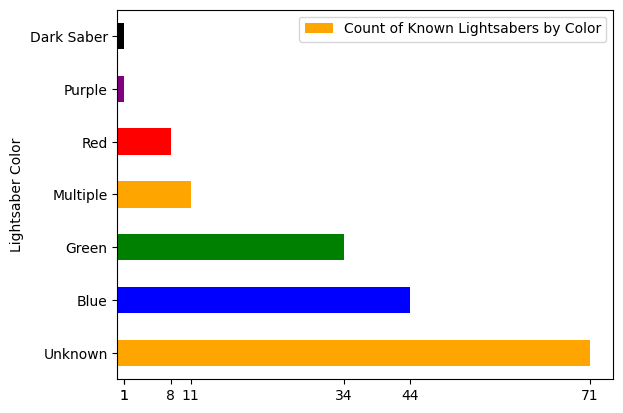

In [172]:
#That looks good, so now we can start creating some visuals to show the results of all this hard work.

#First, let's look at a chart of lightsaber colors
df_sabers=pd.DataFrame(jedi_csv['Lightsaber Color'], columns=['Lightsaber Color'])

df_sabers['Lightsaber Color'].value_counts()[:20].plot(kind='barh', color=['orange','blue','green', 'orange','red','purple','black'], xticks=df_sabers['Lightsaber Color'].value_counts())
plt.legend(("Count of Known Lightsabers by Color",))


<Axes: >

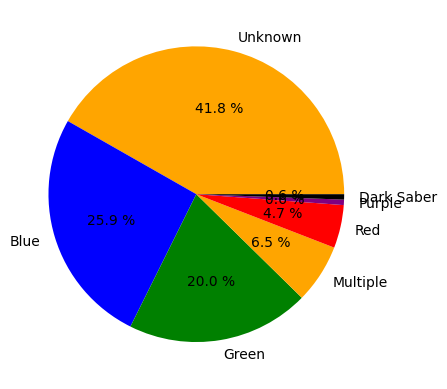

In [173]:
#And we can see what percentage of the total each color makes up using a pie chart.
s=jedi_csv['Lightsaber Color'].squeeze()
s.value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='', legend=False, colors=['orange','blue','green','orange','red','purple','black'])

<Axes: xlabel='Gender'>

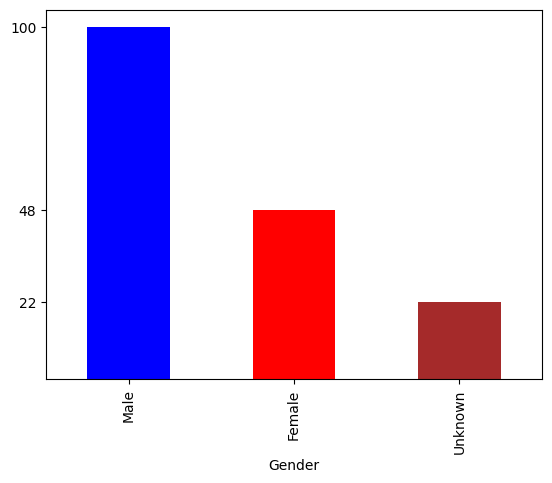

In [174]:
# Let's take a look at what the breakdown by gender of the Jedi are
jedi_csv['Gender'].value_counts().plot(kind='bar', color=['blue','red','brown'], yticks=jedi_csv['Gender'].value_counts())

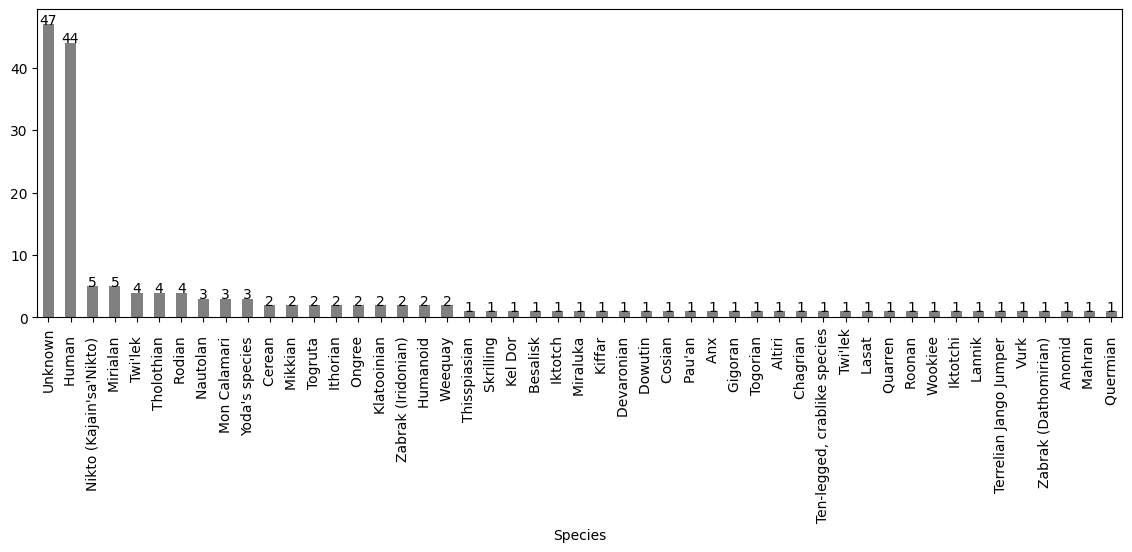

In [175]:
#We can see that there are over twice as many male Jedi as female, based on those whose gender is known.
#This is not necessarily the case, because all of the Unknown may be female. If that were the case then
#there would be closer to a 4:3 ratio. I'd still like to see more balance there, personally.

#Let's take a look at species
plt.figure(figsize=(14,4))
jedi_csv['Species'].value_counts().plot(kind='bar', color='gray')
y=jedi_csv['Species'].value_counts()
x=jedi_csv['Species'].unique()

#plt.bar(x,y)
plt.xticks(rotation=90)
#plt.bar(range(len(y)), sorted(y))
for i in range(len(x)):
    plt.text(i,y[i], y[i],ha='center')

In [176]:
print(jedi_csv['Date of Death'])

0       19 BBY
1       20 BBY
2       19 BBY
3      Unknown
4       19 BBY
        ...   
165    Unknown
166    Unknown
167    Unknown
168     19 BBY
169    Unknown
Name: Date of Death, Length: 170, dtype: object


<StemContainer object of 3 artists>

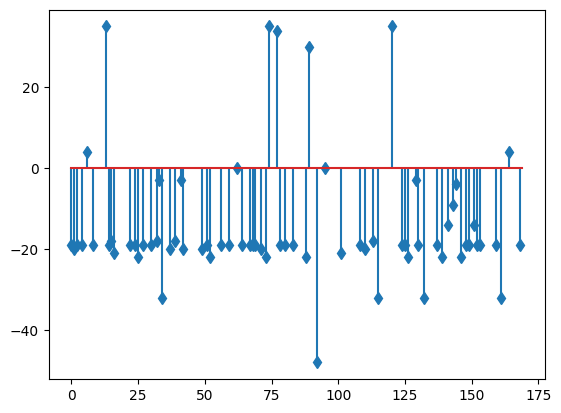

In [177]:
#We can see that we don't know the species of most of the Jedi, but of those we do know, most are human.
#This could mean the unknown continue at the same ratio across the species, but they may all be Qermian or Zabrak, 
#So we can't draw concrete conclusions. We can, however, take this as an inference that humans are more likely to become Jedi.

#Let's take a look at the date of death

#To properly plot this we'll need it in a numerical format, so we'll go about doing that with BBY as a negative and ABY as a positive

jedi_csv['Date of Death Numerical']=None

jedi_csv['Date of Death']=jedi_csv['Date of Death'].str.strip()

import re

for index,row in jedi_csv.iterrows():    
    if row['Date of Death'][0].isdigit():
        row['Date of Death Numerical']=re.findall(r'\d+',row['Date of Death'])
        row['Date of Death Numerical']=int(row['Date of Death Numerical'][0])
        if "BBY" in row['Date of Death']:
            row['Date of Death Numerical']=row['Date of Death Numerical']-(2*row['Date of Death Numerical'])
        #Have to do this to update the actual jedi_csv. For some reason, it didn't used to require this line, but it does now. Did something change in Python?
        jedi_csv.at[index,'Date of Death Numerical']=row['Date of Death Numerical']    
                   
#SO now we should have numerical years they died. Let's try to plot that.

plt.stem(jedi_csv['Date of Death Numerical'], markerfmt='d')
#That looks ok, but we really need to spruce this up a little. Get rid of the stems? Maybe group like numbers, and add BBY and ABY labels to the left 




<StemContainer object of 3 artists>

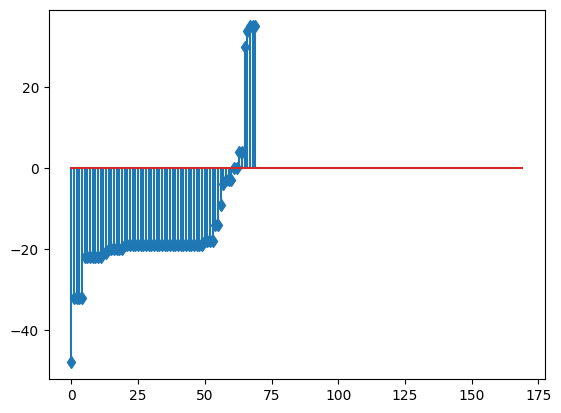

In [178]:
jedi_csv['Date of Death Numerical']=None

import re

for index,row in jedi_csv.iterrows():    
    if row['Date of Death'][0].isdigit():
        row['Date of Death Numerical']=re.findall(r'\d+',row['Date of Death'])
        row['Date of Death Numerical']=int(row['Date of Death Numerical'][0])
        if "BBY" in row['Date of Death']:
            row['Date of Death Numerical']=row['Date of Death Numerical']-(2*row['Date of Death Numerical'])
        #no idea why I suddenly need to add this, but it stopped working without it.
        jedi_csv.at[index,'Date of Death Numerical']=row['Date of Death Numerical'] 
#SO now we should have numerical years they died. Let's try to plot that.

plt.stem(jedi_csv['Date of Death Numerical'].sort_values(axis=0), markerfmt='d')

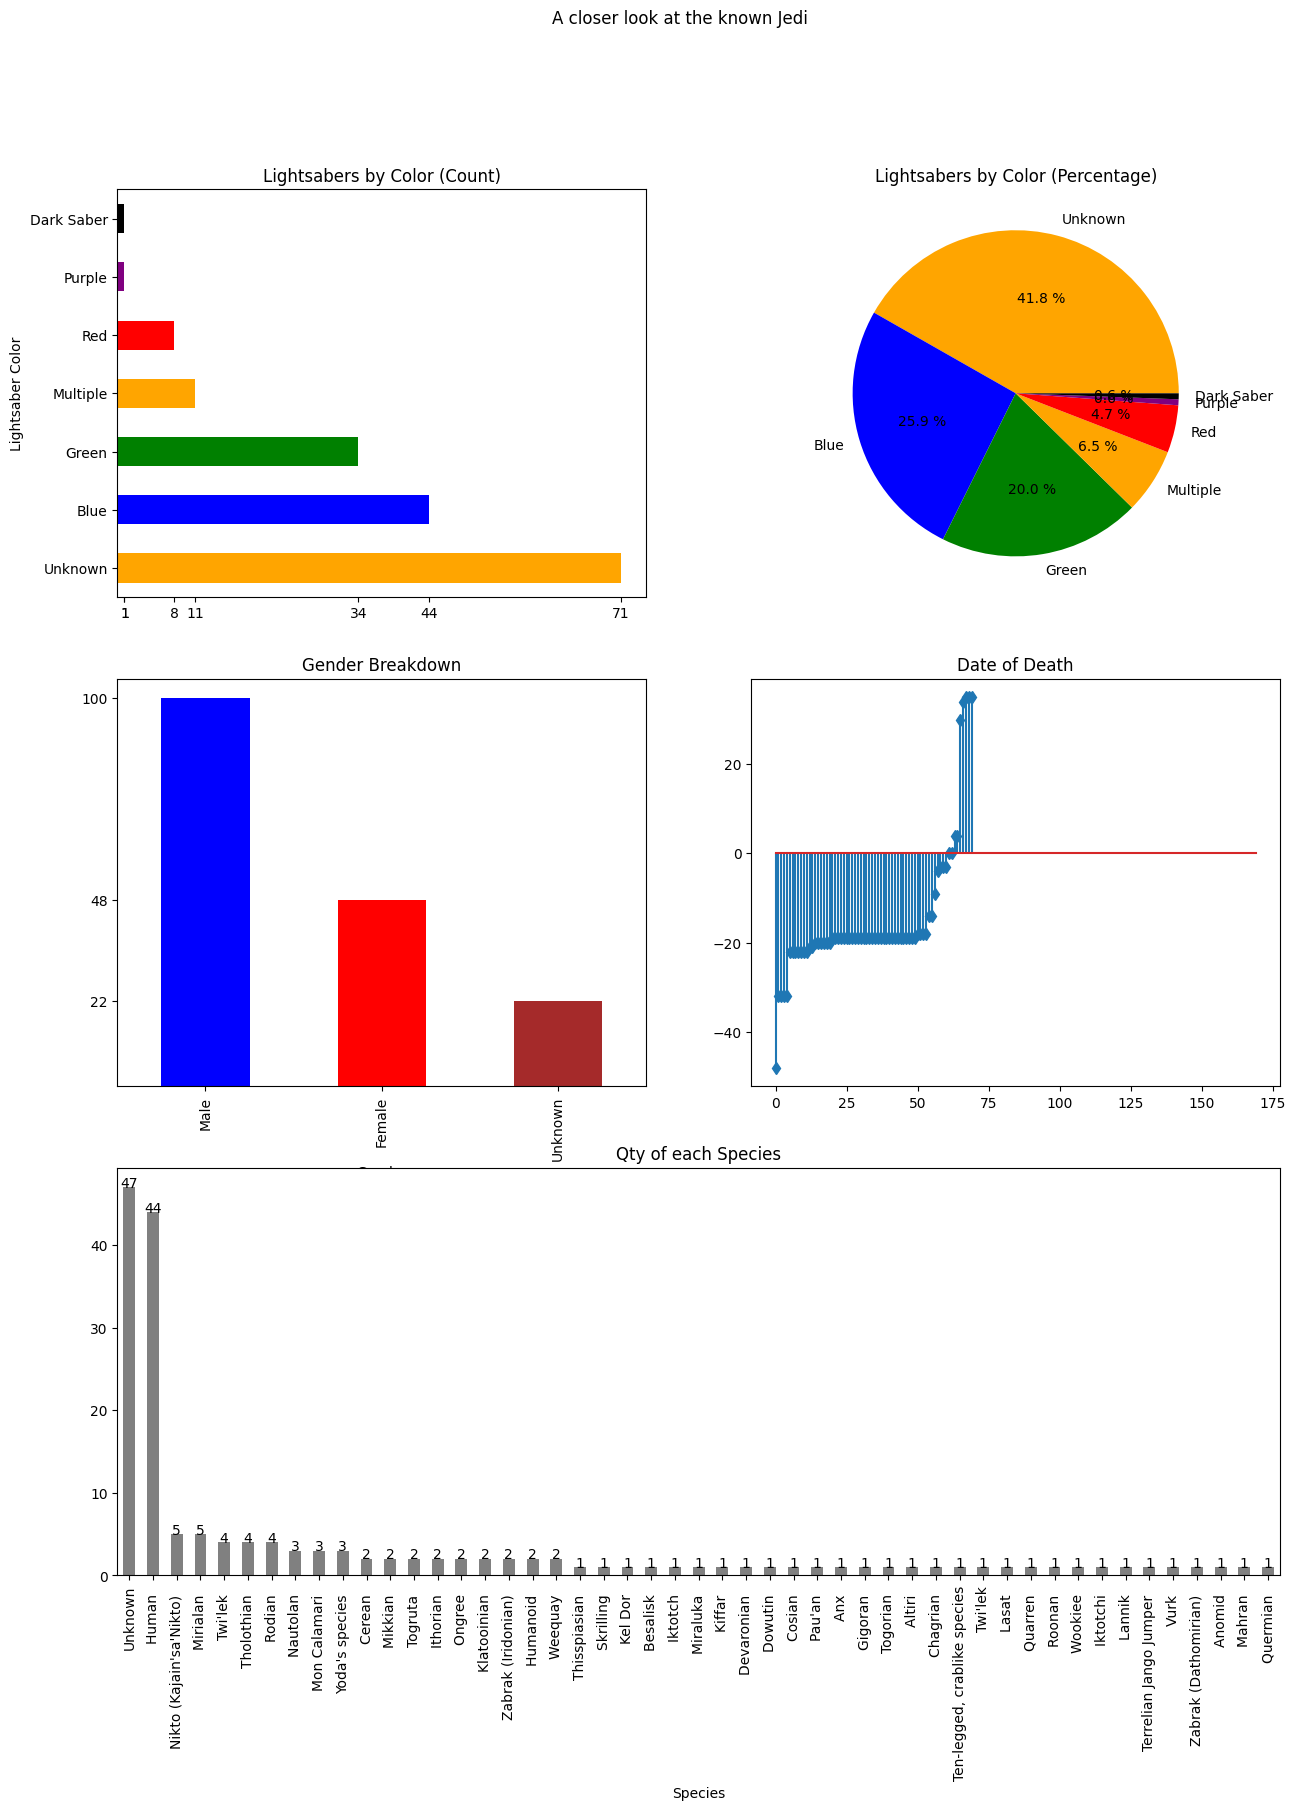

In [179]:
#We can see that the great majority of Jedi died about 19 BBY, which is buring Order 66

#Now let's put this all together into one chart
figs=plt.figure(figsize=(15,18))
figs.suptitle("A closer look at the known Jedi")


gs=figs.add_gridspec(3,2)

ax1=figs.add_subplot(gs[0,0])
ax1.title.set_text('Lightsabers by Color (Count)')
df_sabers['Lightsaber Color'].value_counts()[:20].plot(kind='barh', color=['orange','blue','green', 'orange','red','purple','black'], xticks=df_sabers['Lightsaber Color'].value_counts())
#plt.legend(("Count of Known Lightsabers by Color",))

ax2=figs.add_subplot(gs[0,1])
ax2.title.set_text('Lightsabers by Color (Percentage)')
s=jedi_csv['Lightsaber Color'].squeeze()
s.value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='', legend=False, colors=['orange','blue','green','orange','red','purple','black'])

ax3=figs.add_subplot(gs[1,0])
ax3.title.set_text('Gender Breakdown')
jedi_csv['Gender'].value_counts().plot(kind='bar', color=['blue','red','brown'], yticks=jedi_csv['Gender'].value_counts())

ax4=figs.add_subplot(gs[1,1])
ax4.title.set_text('Date of Death')

jedi_csv['Date of Death Numerical']=None

import re

for index,row in jedi_csv.iterrows():    
    if row['Date of Death'][0].isdigit():
        row['Date of Death Numerical']=re.findall(r'\d+',row['Date of Death'])
        row['Date of Death Numerical']=int(row['Date of Death Numerical'][0])
        if "BBY" in row['Date of Death']:
            row['Date of Death Numerical']=row['Date of Death Numerical']-(2*row['Date of Death Numerical'])
        #no idea why I suddenly need to add this, but it stopped working without it.
        jedi_csv.at[index,'Date of Death Numerical']=row['Date of Death Numerical'] 
#SO now we should have numerical years they died. Let's try to plot that.

plt.stem(jedi_csv['Date of Death Numerical'].sort_values(), markerfmt='d')
#That looks ok, but we really need to spruce this up a little. Get rid of the stems? Maybe group like numbers, and add BBY and ABY labels to the left 

ax5=figs.add_subplot(gs[2,:])
ax5.title.set_text('Qty of each Species')

jedi_csv['Species'].value_counts().plot(kind='bar', color='gray')
y=jedi_csv['Species'].value_counts()
x=jedi_csv['Species'].unique()


for i in range(len(x)):
    plt.text(i,y[i], y[i],ha='center')

plt.show()

### Observations

**Lightsaber Color**

While there are a lot of Jedi whose lightsaber color is unknown, of those we do know blue is the most common, with green slightly behind it in popularity. Of the known saber colors, of the color isn't blue or green then there is a high chance the Jedi has had multiple colors of saber.

**Jedi Gender**

We can also see that there are about twice as many male Jedi as female, at least of those whose gender we know. While the unknown number may continue at a similar rate, we don't know they will. This suggests more Jedi are men than are women overall, but it is only a suggestion and not proof. We don't know the total number of Jedi, which makes this hard to predict. Maybe we know of more male than female because these particular male Jedi happened to be involved in something well known, or maybe those who created the stories of the Jedi were biased toward males. The data is suggestive, not conclusive.

**Date of Death**

A majority of the known Jedi die around 19 BBY (Before the battle of Yavin). For those who know Star Wars history, that is when Order 66 was implemented. During Order 66 the Jedi were declared enemies of The Republic by Chancellor Palpatine and he ordered the clones to kill the Jedi. Additionally, many Jedi and their Padowans died at the hands of Darth Vader at this time. That explains this clumping of data. The data also shows that a small number of Jedi survived to live many years beyond Order 66.

**Species**

Of all the known Jedi, an overwhelming majority of them are human, according to this data. While the total number of Twi'lek, Zabrak, Togruta, and others may add up to more than the total number of humans, the numbers are so lopsided as to show a definite trend toward human Jedi. This is a limited data set, and it may not indicate the number overall, but it is suggestive.

**Additional Thoughts**

This was an incomplete view of the Jedi, based on a small sampling of data. While the point of this was to explore a little about the Jedi, I didn't expect any solid conclusions. And I didn't find any.

There is more that can be done with this data, including showing the master-apprentice relationships, but I'm happy with what I've found here. 
